## Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pickle as pk
import joblib as jb


import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [4]:
df = pd.read_csv('../src/data/train_preprocessed.csv')

In [5]:
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,clean_tweet,tokenized_tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,mayasolovely woman shouldnt complain cleaning ...,"['mayasolovely', 'woman', 'shouldnt', 'complai..."
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,mleew boy dat coldtyga dwn bad cuffin dat hoe ...,"['mleew', 'boy', 'dat', 'coldtyga', 'dwn', 'ba..."
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,urkindofbrand dawg sbabylife ever fuck bitch s...,"['urkindofbrand', 'dawg', 'sbabylife', 'ever',..."
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,c_g_anderson viva_based look like tranny,"['c_g_anderson', 'viva_based', 'look', 'like',..."
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shenikaroberts shit hear might true might fake...,"['shenikaroberts', 'shit', 'hear', 'might', 't..."


In [6]:
# Split into target and predictor
X = df['tokenized_tweet']  
y = df['class']

In [7]:
cv = CountVectorizer()

In [8]:
X_trans = cv.fit_transform(X)
print(X_trans.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=42)

In [11]:
# Create a pipeline with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('oversample', SMOTE(sampling_strategy='auto')),  # You can adjust the sampling_strategy
    ('undersample', RandomUnderSampler(sampling_strategy='auto')),  # You can adjust the sampling_strategy
    ('model', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('oversample', SMOTE()), ('undersample', RandomUnderSampler()),
                ('model', RandomForestClassifier(n_jobs=-1, random_state=42))])

In [12]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

In [14]:
label_names = ['Hateful', 'Offensive', 'Neither']

# Evaluate the model
print(classification_report(y_test, y_pred, target_names=label_names))

              precision    recall  f1-score   support

     Hateful       0.16      0.44      0.23       290
   Offensive       0.93      0.79      0.86      3832
     Neither       0.77      0.83      0.80       835

    accuracy                           0.78      4957
   macro avg       0.62      0.69      0.63      4957
weighted avg       0.86      0.78      0.81      4957



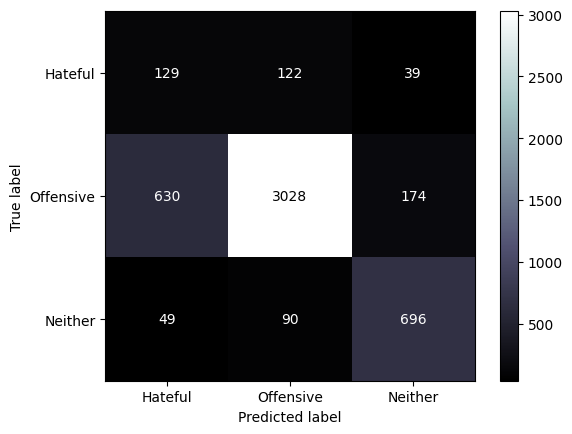

In [15]:
cm_mlp = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=label_names)
cm_display.plot(cmap='bone')
plt.show()

In [18]:
# save the model to dumps
filename = '../src/dumps/rf_pipeline.joblib'
jb.dump(pipeline, filename)

['../src/dumps/rf_pipeline.pkl']